In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.1


In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Getting the fashion dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

# Getting our splits
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 22s 5us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

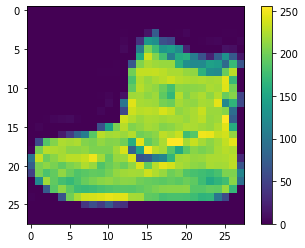

In [6]:
# Here's the first image in the dataset
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
# Scaling to have values in range [0-1]
train_images = train_images / 255.0
test_images = test_images / 255.0

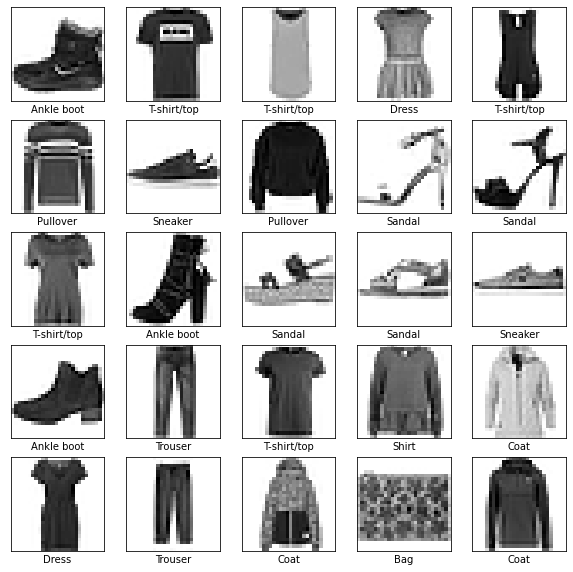

In [8]:
# Here are the first 25 images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [9]:
# Defining our model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [10]:
# Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
# Fitting our model to our training data
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 707us/step - loss: 0.1269 - accuracy: 0.9535
Epoch 2/10
1875/1875 [==============================] - 1s 710us/step - loss: 0.1233 - accuracy: 0.9543
Epoch 3/10
1875/1875 [==============================] - 1s 741us/step - loss: 0.1216 - accuracy: 0.9545
Epoch 4/10
1875/1875 [==============================] - 1s 722us/step - loss: 0.1198 - accuracy: 0.9551
Epoch 5/10
1875/1875 [==============================] - 1s 727us/step - loss: 0.1172 - accuracy: 0.9554
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1143 - accuracy: 0.9564
Epoch 7/10
1875/1875 [==============================] - 2s 880us/step - loss: 0.1144 - accuracy: 0.9571
Epoch 8/10
1875/1875 [==============================] - 1s 779us/step - loss: 0.1117 - accuracy: 0.9586
Epoch 9/10
1875/1875 [==============================] - 2s 848us/step - loss: 0.1086 - accuracy: 0.9594
Epoch 10/10
1875/1875 [==============================] - 1s 723us/

In [15]:
# Testing the model with our test data.
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.4932 - accuracy: 0.8830

Test accuracy: 0.8830000162124634


In [21]:
# Adding softmax to convert to probabilities
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
# Getting the predictions
predictions = probability_model.predict(test_images)

# Here are the probabilities for the first image
predictions[0]

array([4.8307905e-14, 3.8646547e-12, 4.1389158e-12, 5.8245357e-21,
       4.6398544e-14, 1.1689857e-08, 1.9792255e-16, 2.6050575e-06,
       6.4669792e-13, 9.9999738e-01], dtype=float32)

In [23]:
# Getting the most probable class according to the model
print(np.argmax(predictions[0]))
# Printing the real classification
print(test_labels[0])

9
9


In [24]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

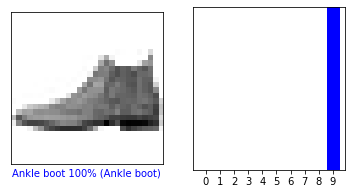

In [25]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

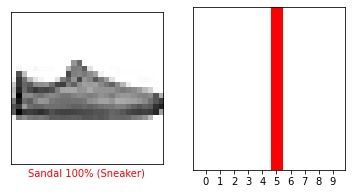

In [26]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

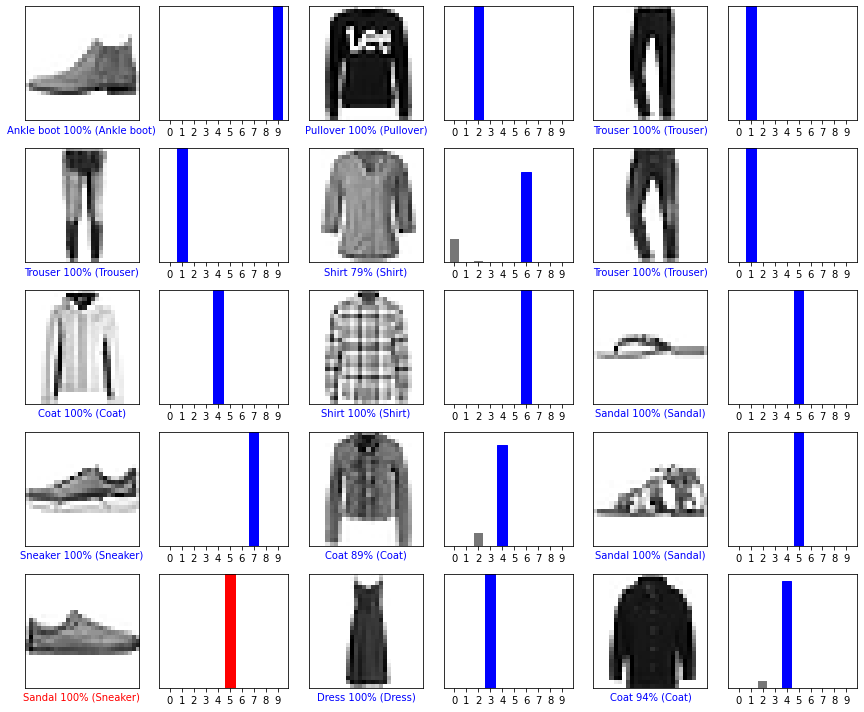

In [27]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [28]:
# Grab an image from the test dataset.
img = test_images[42]

print(img.shape)

(28, 28)


In [29]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [30]:
# Getting prediction for image 42
predictions_single = probability_model.predict(img)

print(predictions_single)

[[6.3065201e-02 1.2693205e-04 4.2542950e-05 1.0450451e-02 7.7849947e-04
  2.1706275e-13 9.2467803e-01 9.3868724e-10 8.5839361e-04 6.8760255e-17]]


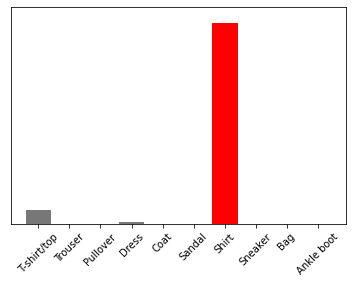

In [31]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [32]:
print("Prediction:", np.argmax(predictions_single[0]))
print("Actual:", test_labels[42])

Prediction: 6
Actual: 3
